In [1]:
import pandas as pd
import numpy as np
import cv2
from dataclasses import dataclass
from typing import List
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Each image is stored as its own jpg, with its label being the local directory name (see the `data/raw/` directory for clarification). Each image needs to be loaded in and saved as an array.

In [39]:
train_dir = "../data/raw/asl_alphabet_train/asl_alphabet_train/"
test_dir = "../data/raw/asl_alphabet_test/asl_alphabet_test/"

@dataclass
class Image:
    data:np.ndarray
    label:str

def get_data(data_dir:str) -> List[Image]:
    images = []
    for label_dir in Path(data_dir).iterdir():
        print(f"Obtaining images of {label_dir.name}...")
        for image in label_dir.iterdir():
            img = cv2.imread(image.as_posix())
            img = cv2.resize(img, (32, 32))
            images.append(Image(img, label_dir.name))
    return images
        
images = get_data(train_dir)

Obtaining images of R...
Obtaining images of U...
Obtaining images of I...
Obtaining images of N...
Obtaining images of G...
Obtaining images of Z...
Obtaining images of T...
Obtaining images of S...
Obtaining images of A...
Obtaining images of F...
Obtaining images of O...
Obtaining images of H...
Obtaining images of del...
Obtaining images of nothing...
Obtaining images of space...
Obtaining images of M...
Obtaining images of J...
Obtaining images of C...
Obtaining images of D...
Obtaining images of V...
Obtaining images of Q...
Obtaining images of X...
Obtaining images of E...
Obtaining images of B...
Obtaining images of K...
Obtaining images of L...
Obtaining images of Y...
Obtaining images of P...
Obtaining images of W...


In [34]:
print(f"Total amount of images: {len(images)}")

Total amount of images: 87000


# Visualizations


Lets plot the distribution of each class

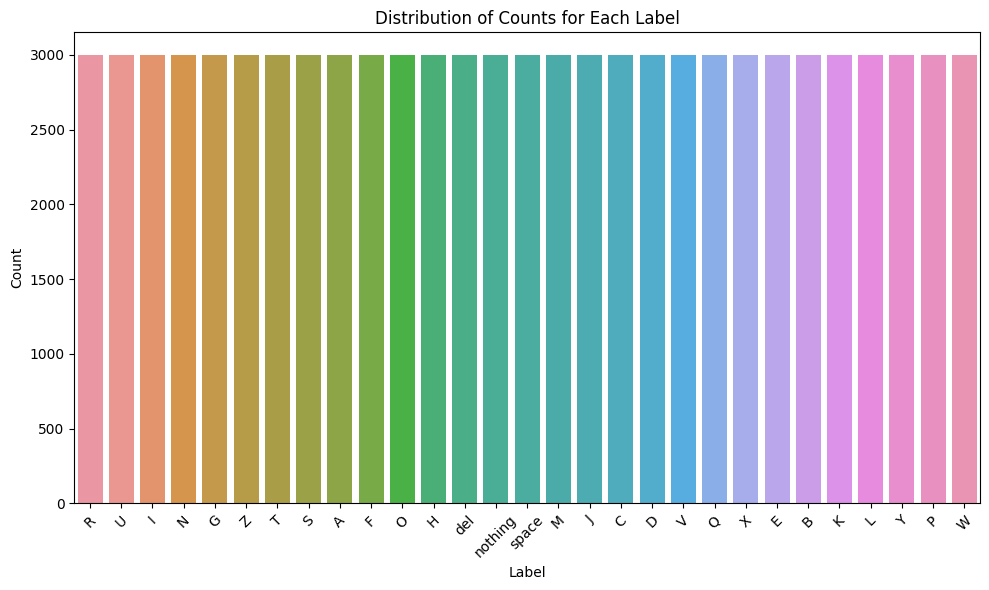

In [35]:
all_labels = [img.label for img in images]
labels_df = pd.Series(Counter(all_labels)).to_frame()\
                                          .reset_index()\
                                          .rename(columns={"index":"label", 0:"count"})


plt.figure(figsize=(10, 6))
sns.barplot(labels_df, x="label", y="count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribution of Counts for Each Label")
plt.tight_layout() 
plt.show()

From the above bar chart, we can see that each class is equally represented in the data.

Next, lets show some of the ASL images (they are reduced to 32x32). 

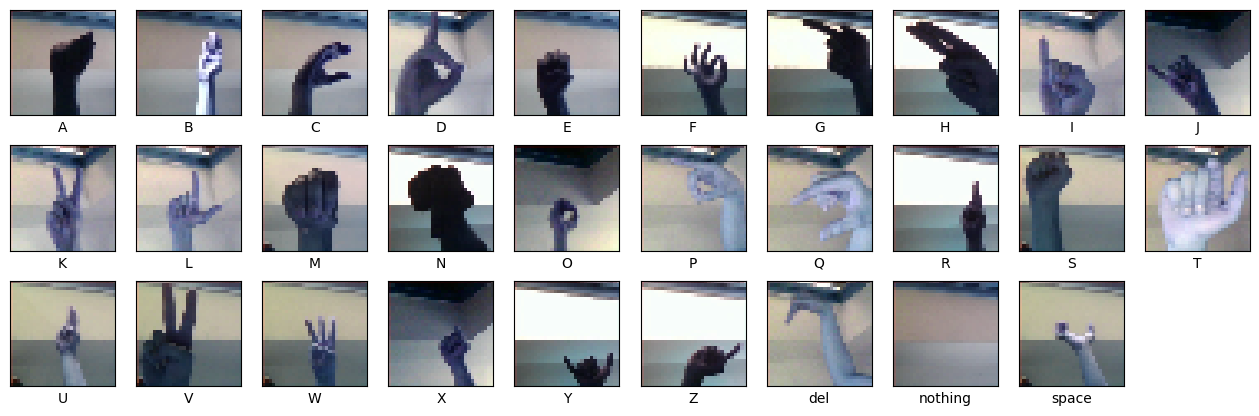

In [40]:
data_df = pd.DataFrame({
    "label" : [img.label for img in images],
    "img" : [img.data for img in images]
})

first_from_each_label = data_df.groupby("label").first()

plt.figure(figsize=(16, 5))
for i in range(29):
    plt.subplot(3, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    img = first_from_each_label.iloc[i]
    plt.imshow(img.values[0])
    plt.xlabel(img.name)
    